感知机算法用于计算得到划分可二分数据集的超平面S。

我们定义优化函数为损失函数：
L=误分类点到超平面S的距离和

\\(d = \frac{1}{{\left\| w \right\|}}|w \bullet {x_i} + b|\\)

\\(L =  - \sum\limits_N {{y_i}} (w \bullet {x_i} + b)\\)

采用随机梯度下降算法

\\(\frac{{dL}}{{dw}} =  - \sum\limits_N {{y_i}} {x_i}\\)

故对于每一个误分类点

\\(w = w + \eta {y_i}{x_i}\\)


## 算法流程：  
输入：w, b；  
训练：f(x)=sign(wx+b)
1. 选取初值w0, b0
2. 随机选取数据(xi, yi)
3. 如果为误分类点，则更新

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

In [14]:
def sign(x):
    if x > 0:
        return 1;
    return -1

In [15]:
def svg(x, y, w, b, learning_rate):
    i = np.random.randint(0, x.shape[0])
#     print("svg")
#     print(w.shape)
#     print(x[0].shape)
#     print(np.dot(w, x[i]))
    if y[i] * (np.dot(w, x[i]) + b) <= 0:
        w = w + learning_rate * x[i].T * y[i]
        b = b + learning_rate * y[i]
    params = {'w':w, 'b':b}
    return params

## 预测：  
输入：x
输出：y=sign(wx+b)

In [16]:
def predict(x, w, b):
    return sign(np.dot(w, x) + b)

## 小数据训练

In [17]:
dim = 2 #属性数量
dataSize = 10 #数据集大小
learning_rate = 0.1 #学习率
ITERATE = 1000 #迭代次数

x_train = np.array([[-1, 1], [-2, 0], [-1, 0], [-0.5, 0.5], [0, 0.5],[1, 3], [2, 3], [1, 1], [1, -0.5], [1, 0]])
x_train = x_train.reshape(10, dim, 1)
y_train = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1])
# print(x_train.shape)
# print(x_train[0].shape)

w = np.zeros((1, dim))
b = 0

assert(x_train.shape == (dataSize, dim, 1))
assert(x_train[0].shape == (dim, 1))
assert(w.shape == (1, dim))

for x in range(ITERATE):
    params = svg(x_train, y_train, w, b, learning_rate)
    w = params['w']
    b = params['b']

print(w)
print(b)

[[-0.3 -0.1]]
0.1


## 训练情况

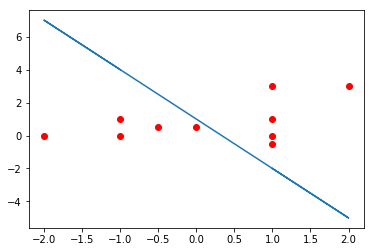

In [18]:
# print(x_train.T.shape)
plt.plot(x_train.T[0][0], x_train.T[0][1], 'ro')
y_hp = np.zeros(dataSize)
for i in range(x_train.shape[0]):
    y_hp[i] = (x_train.T[0][0][i]*w[0][0]+b)/w[0][1]*-1

plt.plot(x_train.T[0][0], y_hp)
plt.show()

## 预测

In [19]:
x_predict = np.array([1, 3])
# print(x_predict.shape)
predict(x_predict, w, b)

-1

## 数据生成器

In [24]:
def getData(rg, dim, size):
#     w = np.random.rand(1, dim)
#     b = np.random.randint(-rg/2, rg/2)
    w = np.array([1, 1])
    b = 2.5
    x = []
    y = []
    for i in range(size):
        x_i = np.random.rand(dim, 1) * rg - rg/2
        y_i = -1
        if np.dot(w, x_i) + b > 0:
            y_i = 1
        x.append(x_i)
        y.append(y_i)
    x = np.array(x)
    y = np.array(y)
#     print("getData")
#     print(x)
    data = {"x":x, "y":y}
    return data

## 大数据测试

In [34]:
rangeOfNumber = 10 #随机数的范围
dim = 2 #属性数量
dataSize = 1000 #数据集大小
testSize = 2000 #测试集大小
learning_rate = 0.05 #学习率
ITERATE = 1000 #迭代次数

data_train = getData(rangeOfNumber, dim, dataSize)
x_train = data_train["x"]
y_train = data_train["y"]
# print(x_train.shape)
# print(x_train[0].shape)

w = np.zeros((1, dim))
b = 0

assert(x_train.shape == (dataSize, dim, 1))
assert(x_train[0].shape == (dim, 1))
assert(w.shape == (1, dim))

for x in range(ITERATE):
    params = svg(x_train, y_train, w, b, learning_rate)
    w = params['w']
    b = params['b']

print(w)
print(b)

[[ 0.39878181  0.47926402]]
0.95


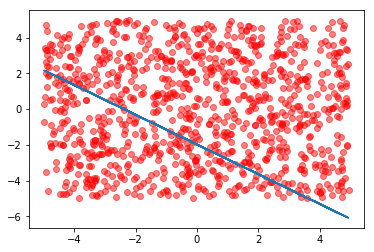

In [35]:
# print(x_train.T.shape)
plt.plot(x_train.T[0][0], x_train.T[0][1], 'ro', alpha = 0.5)
y_hp = np.zeros(dataSize)
for i in range(x_train.shape[0]):
    y_hp[i] = (x_train.T[0][0][i]*w[0][0]+b)/w[0][1]*-1

plt.plot(x_train.T[0][0], y_hp)
plt.show()

## 预测

In [36]:
data_test = getData(rangeOfNumber, dim, testSize)
x_test = data_test["x"]
y_test = data_test["y"]
y_predict = []
for i in range(testSize):
    y_predict.append(predict(x_test[i], w, b))
cnt = 0
for i in range(testSize):
    if y_test[i] == y_predict[i]:
        cnt = cnt + 1
print("Accuracy:%d"  % (cnt / testSize * 100))

Accuracy:96


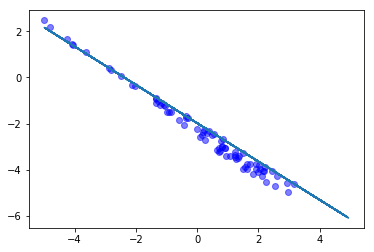

In [37]:
tem = [x_test[i] for i in range(testSize) if y_predict[i] != y_test[i]]
tem = np.array(tem)
# print(tem.shape)

assert(tem.shape[0] != 0)

plt.plot(tem.T[0][0], tem.T[0][1], 'bo', alpha = 0.5)

y_hp = np.zeros(dataSize)
for i in range(x_train.shape[0]):
    y_hp[i] = (x_train.T[0][0][i]*w[0][0]+b)/w[0][1]*-1

plt.plot(x_train.T[0][0], y_hp)
plt.show()

在下面这种情况下，准确率可以达到100%：  
learning_rate = 0.01  
ITERATE = 1000000